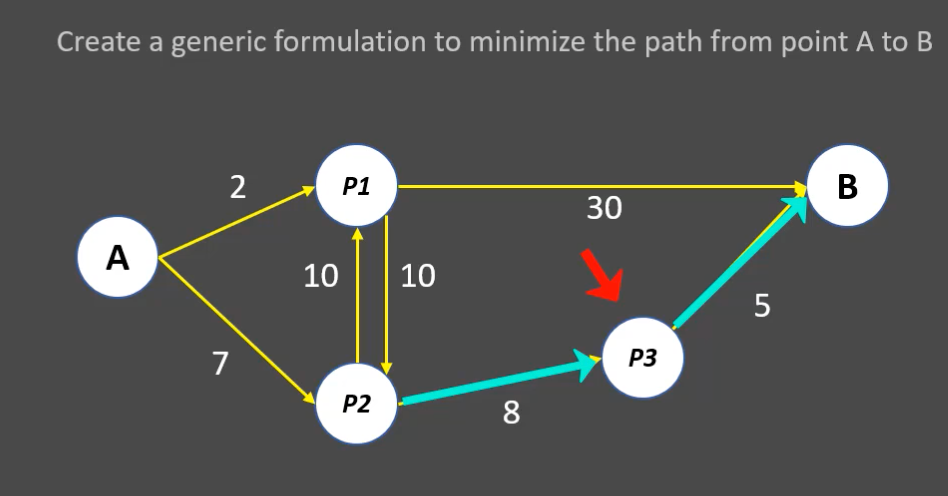

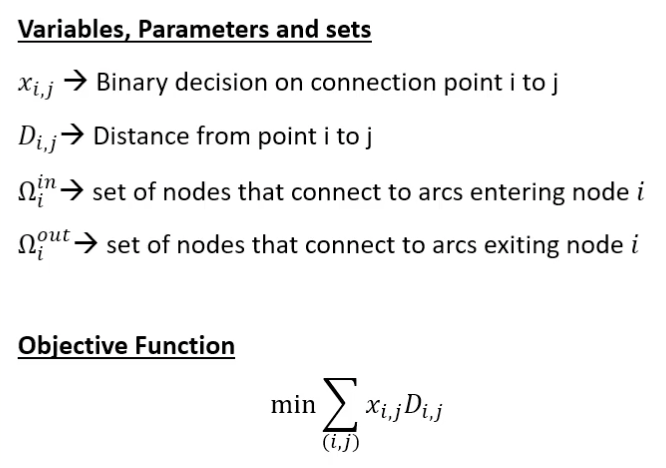

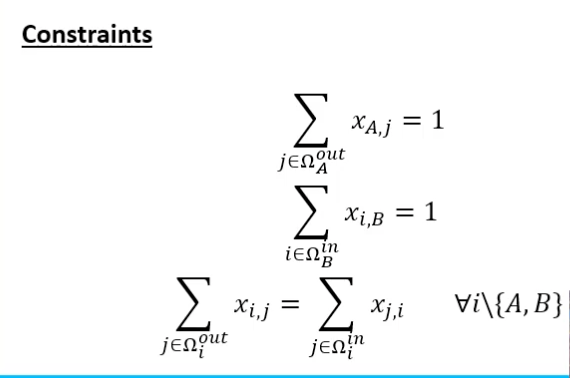

 ### Google Colab

In [ ]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
ipopt_executable = '/content/ipopt'

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 49 kB 853 kB/s 


## Mac-OS

In [ ]:
!pip install -q pyomo
!curl -s https://ampl.com/dl/open/ipopt/ipopt-osx.zip --output ipopt-osx.zip
!tar xf ipopt-osx.zip ipopt
ipopt_executable = "./ipopt"
!rm ipopt-osx.zip

## Window PC

In [ ]:
!conda install -c conda-forge pyomo pyomo.extras
!conda install -c conda-forge/label/cf201901 ipopt 

 ### Google Colab

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()


In [ ]:
#sets of points
model.setAllPoints = ['A','P1','P2','P3','B']
model.setPoints = ['P1','P2','P3']

#sets of routes from to
model.setRoutes = [['A','P1'],['A','P2'],['P1','P2'],['P2','P1'],['P1','B'],['P2','P3'],['P3','B']]
model.setRoutes_from = {key:[] for key in model.setAllPoints}
model.setRoutes_to = {key:[] for key in model.setAllPoints}

for route in model.setRoutes:
    model.setRoutes_from[route[0]].append(route[1])
    model.setRoutes_to[route[1]].append(route[0])


In [ ]:
model.setRoutes_from

{'A': ['P1', 'P2'],
 'P1': ['P2', 'B'],
 'P2': ['P1', 'P3'],
 'P3': ['B'],
 'B': []}

In [ ]:
model.setRoutes_to

{'A': [],
 'P1': ['A', 'P2'],
 'P2': ['A', 'P1'],
 'P3': ['P2'],
 'B': ['P1', 'P3']}

In [ ]:
#parameters
model.D = {}
model.D['A','P1'] = 2
model.D['A','P2'] = 7
model.D['P1','P2'] = 10
model.D['P2','P1'] = 10
model.D['P1','B'] = 30
model.D['P2','P3'] = 8
model.D['P3','B'] = 5

